<a href="https://colab.research.google.com/github/nagelex/kaaglespam1/blob/main/spam_project_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

##  BASIC PREPARATION OF THE DATASET
Missing values, useless columns, checkind the stats(distributions, mean values), adding new columns

In [ ]:
data = pd.read_csv('./Emails.csv')
data.tail(5) # i want to see if ham data make any sense

NameError: name 'pd' is not defined

it is messy, but we will try our best

In [ ]:
data = data.rename(columns = {'spam':'label'}) #to name it more accurately
print(data.head())
print(data.shape)

In [ ]:
data.isnull().sum() #some missing values?

In [ ]:
data.duplicated().sum()

In [ ]:
df = data.copy()

In [ ]:
df.drop_duplicates(keep = 'first') #cause we don't want any duplicates

In [ ]:
df.duplicated().sum()

In [ ]:
import matplotlib.pyplot as plt

#we want to know what is the distribution between spam and ham data, so let's polt and count it
label_stats = df.groupby('label').agg(count=('label', 'count'))
label_stats.plot(kind = 'barh')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution')
plt.show()
print(df['label'].value_counts())

data is quite imbalanced

In [ ]:
df['lenght'] = df['text'].apply(len)
df.head(2)

In [ ]:
for i in df.columns:
  print (df[i].describe())
  print('---------------------')

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

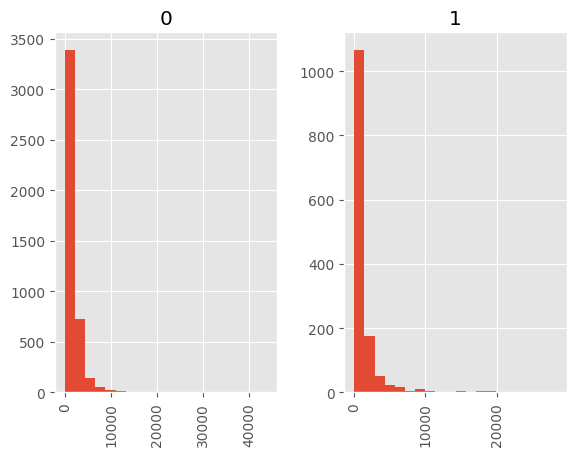

In [ ]:
plt.rcParams['patch.edgecolor'] = 'black'
plt.style.use('ggplot')
df.hist(column= 'lenght', by = 'label', bins = 20)

so we see that the text lenght can is not a game-changer here



In [ ]:
df = df.copy()

In [ ]:
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#making a new feature - word number
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head(3)

,text,label,lenght,num_words
0,Subject: naturally irresistible your corporate...,1,1484,325
1,Subject: the stock trading gunslinger fanny i...,1,598,90
2,Subject: unbelievable new homes made easy im ...,1,448,88


In [ ]:
#new feature-number of sentances
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head(3)

,text,label,lenght,num_words,num_sentences
0,Subject: naturally irresistible your corporate...,1,1484,325,11
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1
2,Subject: unbelievable new homes made easy im ...,1,448,88,4


In [ ]:
df[['lenght','num_words','num_sentences']].describe() #general stats

,lenght,num_words,num_sentences
count,5728.000000,5728.000000,5728.000000
mean,1556.768680,327.982542,19.483240
std,2042.649812,418.833125,35.936051
min,13.000000,3.000000,1.000000
25%,508.750000,102.000000,7.000000
50%,979.000000,211.000000,12.000000
75%,1894.250000,403.000000,22.000000
max,43952.000000,8479.000000,1565.000000


In [ ]:
#stats for ham messages
df[df['label'] == 0][['lenght','num_words','num_sentences']].describe()

,lenght,num_words,num_sentences
count,4360.000000,4360.000000,4360.000000
mean,1631.918119,346.835321,19.862615
std,1959.664549,406.228875,38.051542
min,13.000000,3.000000,1.000000
25%,577.750000,120.000000,7.000000
50%,1122.000000,240.000000,13.000000
75%,2037.250000,440.250000,22.000000
max,43952.000000,8479.000000,1565.000000


In [ ]:
 #stats for spam messages
df[df['label'] == 1][['lenght','num_words','num_sentences']].describe()

,lenght,num_words,num_sentences
count,1368.000000,1368.000000,1368.000000
mean,1317.257310,267.896199,18.274123
std,2271.372893,451.623124,28.130434
min,18.000000,5.000000,1.000000
25%,401.500000,80.000000,6.000000
50%,693.500000,141.000000,11.000000
75%,1250.250000,252.000000,18.000000
max,28432.000000,6131.000000,438.000000


plotting our distributions for features to comapare ham VS spam:

lenght?
num_words
num_sentance

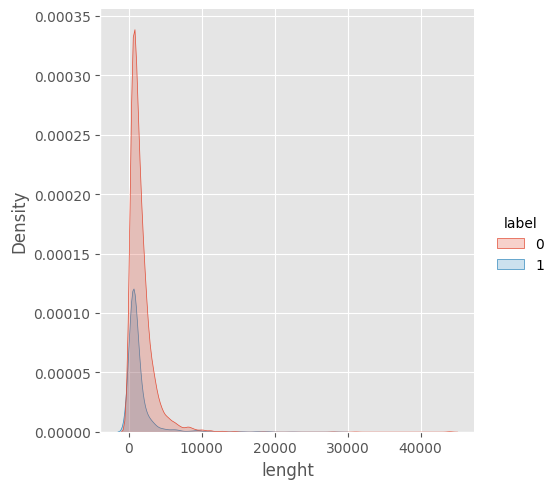

In [ ]:
import seaborn as sns
sns.displot(data = df, x = 'lenght', hue = 'label', kind = 'kde', fill = True)

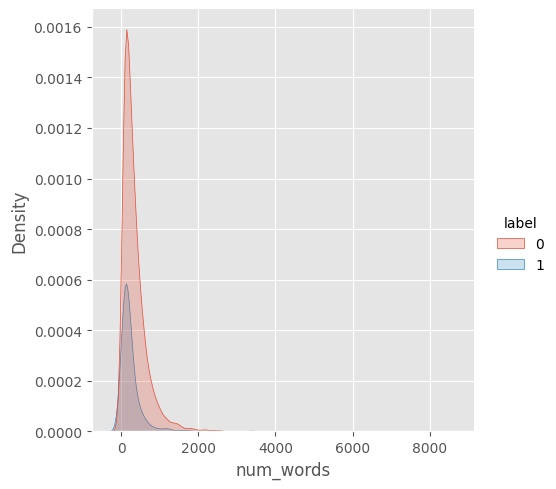

In [ ]:
sns.displot(data = df, x = 'num_words', hue = 'label', kind = 'kde', fill = True)

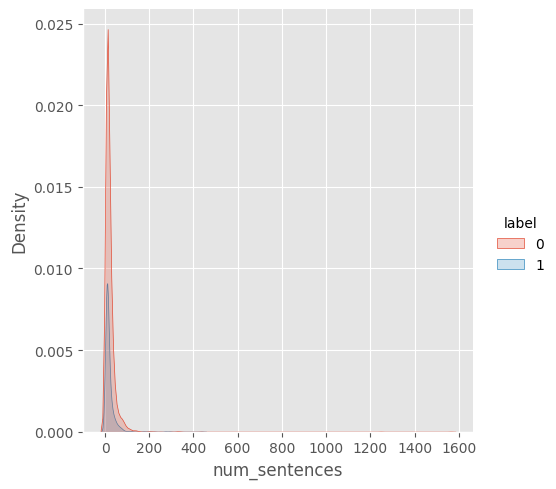

In [ ]:
sns.displot(data = df, x = 'num_sentences', hue = 'label', kind = 'kde', fill = True)

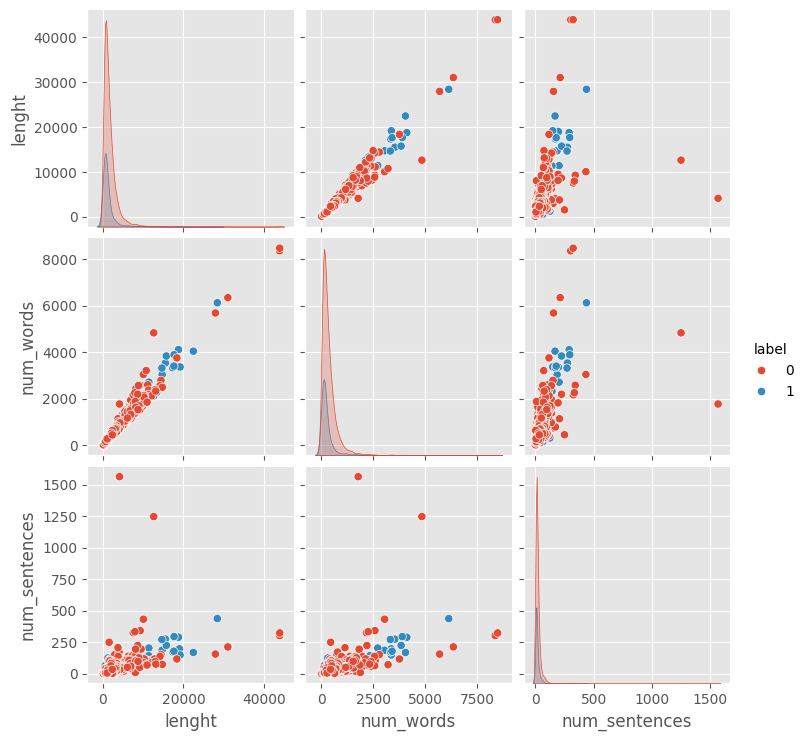

In [ ]:
sns.pairplot(df, hue = 'label') # we will see the plot with corr and print it
nr_df = df.select_dtypes(include = 'number').corr()

Axes(0.125,0.11;0.62x0.77)


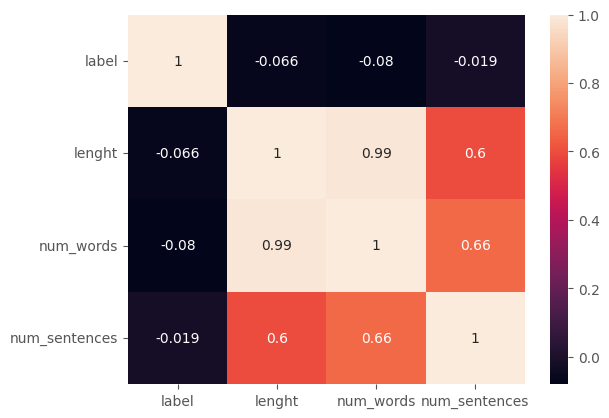

In [ ]:
print(sns.heatmap(nr_df, annot = True))


not really helpful

so maybe the content will be a defining thing

#The part with the text preprocessing

we don't want any sentiment analysis, so emoticones (if appeared) will be removed

1. lower casing (in case there are still some upper cases)
2. tockenization
3. removal of special characters
 and stopwords
4. stemming
5. removal of the most frequent words


In [ ]:
#1 lowercasing
#2 tokenization and 3 removal of punctuations !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
# we also uploaded nltk packadge for word tockenization and other purposes
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

print(f"symbols, that going to be removed:{string.punctuation}")

symbols, that going to be removed:!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
#1-4
def preprocess_text(input_string):
  """our function to preprocess the text"""
  input_string = input_string.lower() #lower case
  input_tocken = nltk.word_tokenize(input_string) #tokenization
  nonumbers_token = [i for i in input_tocken if i.isalnum()] #remove non-alphanumeric tokens
  clean_string = ([i for i in nonumbers_token if i not in string.punctuation and i not in stopwords.words('english')])
  stemmed_tokens = [ps.stem(i) for i in clean_string]
  stemmed_string = " ".join(stemmed_tokens)
  return stemmed_string

In [ ]:
control = preprocess_text(df['text'][4000])
print(control)

subject weather energi price data mulong wang 04 24 2001 10 58 43 cc subject weather energi price data hello elena thank much data sent email ft respons far soon got permiss let know great day mulong thu 19 apr 2001 elena chilkina enron com wrote mulong pleas find attach file henri hub natur ga price data start 1995 given daili basi pleas let us know proceed electr price sincer elena chilkina see attach file henryhub xl vinc j kaminski ect 04 16 2001 08 19 mulong wang enron cc vinc j kaminski hou ect ect elena chilkina corp enron enron macminnr ut cc utexa edu subject weather energi price data document link elena chilkina mulong shall send natur ga henri hub price right away pleas look last winter winter 95 96 shall prepar electr price inform cinergi cobb palo verd approach ft publish megawatt daili newslett produc price index recommend use request permis use data allow distribut inform pleas explain academ research produc time seri condit permiss publish megawatt daili vinc kaminski m

In [ ]:
df['tf_text'] = df['text'].apply(preprocess_text)

In [ ]:
df.tail(10)

i think it make sense

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width= 1000,
               height = 1000,
               min_font_size = 10,
               background_color = 'white')

In [ ]:
ham_wc = wc.generate(df[df['label']== 0]['tf_text'].str.cat(sep = " "))
plt.imshow(ham_wc)

In [ ]:
spam_wc = wc.generate(df[df['label']== 1]['tf_text'].str.cat(sep = " "))
plt.imshow(spam_wc)

In [ ]:
from collections import Counter
cnt = Counter()

for row in df[df["label"] == 0].itertuples():
    # Get the text from the 'tf_text' column of the current row
    text = row.tf_text
    tokens = nltk.word_tokenize(text)

    # Count the occurrences of each word
    cnt.update(tokens)

# Get the 10 most common words
most_common_words = cnt.most_common(10)

for row in df[df["label"] == 1].itertuples():
    # Get the text from the 'tf_text' column of the current row
    text = row.tf_text
    tokens = nltk.word_tokenize(text)

    # Count the occurrences of each word
    cnt.update(tokens)

# Get the 10 most common words
most_common_words1 = cnt.most_common(10)

print(most_common_words,
      most_common_words1)

Removing the most frequent words, such as 'enron', 'ect', 'subject', 'vinc', 'hou', '2000', 'kaminski', 'pleas', 'com', 'would', might be beneficial for certain text analysis tasks, especially if these words are common across both spam and ham categories and do not contribute much to the classification or analysis.



In [ ]:
FREQWORDS = {'enron', 'ect', 'subject', 'vinc', 'hou', '2000', 'kaminski', 'pleas', 'com', 'would'}

def remove_freqwords(text):
    """Custom function to remove the frequent words"""
    tokens_clean = text.split()
    tokens_clean = [word for word in tokens_clean if word.lower() not in FREQWORDS]
    cleaned_text = ' '.join(tokens_clean)
    return cleaned_text

# Apply the remove_freqwords function to each text
df['tf_text_clean'] = df['tf_text'].apply(remove_freqwords)

In [ ]:
df.head(3)

we will use our last column as an input for models

In [ ]:
# output_file_path = "/content/ham_corpus.txt"

# # Open the file in write mode
# with open(output_file_path, "w") as file:
#     # Iterate over the texts and write each text to the file
#     for text in df[df['label'] == 0]['tf_text_clean'].tolist():
#       words = text.split()
#       for word in words:
#         file.write(word + "\n")
# # Provide a download link for the file
# print("Ham corpus has been written to:", output_file_path)

In [ ]:

df.to_csv("data_project.csv", index = False)

##Model Building

In [ ]:
#input is tf_text_clean and output is column with labels
# vectorizers

df = pd.read_csv('./data_project.csv')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, classification_report

random_state = 42
test_size = 0.2

cv = CountVectorizer() #it only focuses on the frequency of the words present in the corpus
tfidf = TfidfVectorizer() #focues on the frequency and provides the importance of the words
#our classifiers
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
X = cv.fit_transform(df['tf_text_clean']).toarray()

In [ ]:
X.shape

(5728, 29210)

In [ ]:
y = df['label'].values

In [ ]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = test_size, random_state = random_state)

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


# model = LogisticRegression(C= 1)

# # Fit the model on the training data
# model.fit(X_train, y_train)

# # Predict on the test set
# y_pred = model.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)

# print(confusion_matrix(y_test, y_pred))
# print(precision_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))
# print(accuracy)

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))
print(classification_report(y_test, y_pred1))


pretty good stats

In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

looks like overfitting

In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

pretty good too, i will use it for my tfidf vectorizer

In [ ]:
X = tfidf.fit_transform(df['tf_text_clean']).toarray()

In [ ]:
X.shape

(5728, 29210)

In [ ]:
y = df['label'].values

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = test_size, random_state = random_state)

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))
print(classification_report(y_test, y_pred1))


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))
print(classification_report(y_test, y_pred3))




In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X = tfidf.fit_transform(df['tf_text_clean']).toarray()
X = scaler.fit_transform(X)

In [ ]:
# #tfidf --> bnb

# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import ExtraTreesClassifier

# from sklearn.model_selection import GridSearchCV, ShuffleSplit
# from tqdm import tqdm

# models = {'Logistic_Regression': {
#             'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
#             'parameters': {
#                 'C': [1,5,10]
#             }
#     }
# }

# def evaluate_model(model_name, X, y, model_params, cv):
#     gs = GridSearchCV(model_params['model'], model_params['parameters'], cv=cv, return_train_score=False)
#     gs.fit(X, y)
#     return {
#         'model': model_name,
#         'best_parameters': gs.best_params_,
#         'score': gs.best_score_
#     }

# # Prepare to collect the grid search results
# scores = []

# cv_shuffle = ShuffleSplit(n_splits=7, test_size=0.2, random_state=0)

# # Perform grid search with progress bar
# with tqdm(total=len(models), desc="Model Grid Search") as pbar:
#     for model_name, model_params in models.items():
#         result = evaluate_model(model_name, X_train, y_train, model_params, cv_shuffle)
#         scores.append(result)
#         pbar.update(1)  # Update progress bar

# # Convert results to DataFrame
# results_df = pd.DataFrame(scores, columns=['model', 'best_parameters', 'score'])

# # Print the results
# print(results_df)

# # Select the best model based on grid search
# best_model_name = results_df.loc[results_df['score'].idxmax(), 'model']
# best_model_params = models[best_model_name]['model'].set_params(**results_df.loc[results_df['score'].idxmax(), 'best_parameters'])

# # Fit the best model on the training data
# best_model_params.fit(X_train, y_train)

# # Predict on the test set
# y_pred = best_model_params.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)

# # Print the evaluation result
# print(f"Best Model: {best_model_name}")
# print(f"Best Parameters: {results_df.loc[results_df['score'].idxmax(), 'best_parameters']}")
# print(f"Test Set Accuracy: {accuracy:.4f}")
# print("Test Set Accuracy:", accuracy)


Model Grid Search: 100%|██████████| 1/1 [05:11<00:00, 311.10s/it]


                 model best_parameters     score
0  Logistic_Regression        {'C': 1}  0.983487
Best Model: Logistic_Regression
Best Parameters: {'C': 1}
Test Set Accuracy: 0.9808
Test Set Accuracy: 0.9808027923211169


a number of classifiers has been tested (Desicion Tree, KNN, SVC, Random forest)

the highest scores were achived by MNB, LogisticRegression and BNB, so we gonna evaluate their performance

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.metrics import accuracy_score, precision_score
from tqdm import tqdm

def evaluate_model(model_name, X_train, y_train, X_test, y_test, model_params, cv):
    """
    Evaluates a single machine learning model using GridSearchCV.

    Args:
        model_name: Name of the model to be evaluated.
        X_train: Training data features.
        y_train: Training data labels.
        X_test: Test data features.
        y_test: Test data labels.
        model_params: Dictionary containing the model instance and its hyperparameter grid.
        cv: Cross-validation object for evaluation.

    Returns:
        A dictionary containing the model name, best hyperparameters, and scores (accuracy and precision) for train and test sets.
    """
    gs = GridSearchCV(model_params['model'], model_params['parameters'], cv=cv, return_train_score=False)
    gs.fit(X_train, y_train)

    best_model = gs.best_estimator_

    # Evaluate on train set
    y_train_pred = best_model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='binary')

    # Evaluate on test set
    y_test_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='binary')

    return {
        'model': model_name,
        'best_parameters': gs.best_params_,
        'train_accuracy': train_accuracy,
        'train_precision': train_precision,
        'test_accuracy': test_accuracy,
        'test_precision': test_precision
    }

def find_best_models(X_train, y_train, X_test, y_test):
    """
    Evaluates multiple machine learning models using GridSearchCV with progress bar.

    Args:
        X_train: Training data features.
        y_train: Training data labels.
        X_test: Test data features.
        y_test: Test data labels.

    Returns:
        A DataFrame containing the evaluation results (model name, best hyperparameters, and scores) for all models.
    """
    models = {
        'Logistic_Regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
            'parameters': {
                'C': [1, 10]
            }
        },
        'BernoulliNB': {
            'model': BernoulliNB(),
            'parameters': {
                'alpha': [0.1]
            }
        },
        'Multinomial_Naive_Bayes': {
            'model': MultinomialNB(),
            'parameters': {
                'alpha': [2]
            }
        }
    }

    cv_shuffle = ShuffleSplit(n_splits=7, test_size=test_size, random_state= random_state)
    scores = []

    with tqdm(total=len(models)) as pbar:
        for model_name, model_params in models.items():
            result = evaluate_model(model_name, X_train, y_train, X_test, y_test, model_params, cv_shuffle)
            scores.append(result)
            pbar.update(1)  # Update progress bar

    return pd.DataFrame(scores, columns=['model', 'best_parameters', 'train_accuracy', 'train_precision', 'test_accuracy', 'test_precision'])

# Example usage
# Assuming X_train, y_train, X_test, and y_test are your training and test data
results_df = find_best_models(X_train, y_train, X_test, y_test)
print(results_df)


100%|██████████| 3/3 [02:47<00:00, 55.82s/it]

                     model best_parameters  train_accuracy  train_precision  \
0      Logistic_Regression       {'C': 10}        1.000000         1.000000   
1              BernoulliNB  {'alpha': 0.1}        0.990179         0.959929   
2  Multinomial_Naive_Bayes    {'alpha': 2}        0.990397         1.000000   

   test_accuracy  test_precision  
0       0.975567        0.988806  
1       0.979058        0.926282  
2       0.954625        0.976000  


In [ ]:
results_df.head(3)

,model,best_parameters,train_accuracy,train_precision,test_accuracy,test_precision
0,Logistic_Regression,{'C': 10},1.000000,1.000000,0.975567,0.988806
1,BernoulliNB,{'alpha': 0.1},0.990179,0.959929,0.979058,0.926282
2,Multinomial_Naive_Bayes,{'alpha': 2},0.990397,1.000000,0.954625,0.976000


<Figure size 1400x800 with 0 Axes>

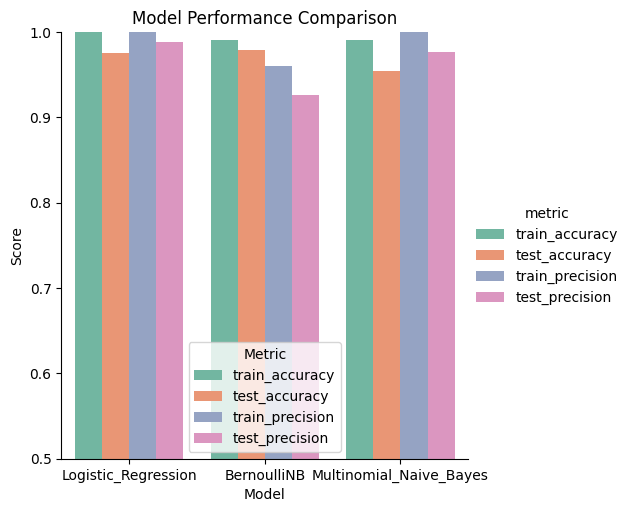

In [ ]:
results_long = results_df.melt(id_vars='model', value_vars=['train_accuracy', 'test_accuracy', 'train_precision', 'test_precision'],
                               var_name='metric', value_name='score')

# Plot the results
plt.figure(figsize=(14, 8))
sns.catplot(x='model', y='score', hue='metric', data=results_long, kind = 'bar', palette = 'Set2')
plt.ylim(0.5, 1.0)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.legend(title='Metric')
plt.show()

logistic regression is our winner (fed up with preprocessed and scaled data)

##Model improvement
- frankly, it s already hitting great scores; I will try not to downgrade it and we go to the next step

Actually, there is a great chance of overfitting

##Model building


In [ ]:
model = LogisticRegression (C = 10,solver='lbfgs', multi_class='auto')

In [ ]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(model,open('model.pkl', 'wb'))